<a href="https://colab.research.google.com/github/hufsaim/T10302201/blob/main/notebook_2025/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [2]:
video_path = 'mydata.mp4'
cap = cv2.VideoCapture(video_path)

In [3]:
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Total frames: {frame_count}")

fps = cap.get(cv2.CAP_PROP_FPS)
print(f"Frames per second (FPS): {fps}")

xr = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
yr = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
print(f"resolution: {yr} x {xr}")

Total frames: 475
Frames per second (FPS): 30.0
resolution: 3840.0 x 2160.0


In [4]:
R = 8
xr_ = int(xr/R)
yr_ = int(yr/R)

n=0

frames = np.zeros((frame_count,yr_,xr_,3)).astype(np.uint8)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    resized = cv2.resize(frame, (xr_, yr_))
#    resized_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    frames[n,:,:,:] = resized
    n += 1
cap.release()

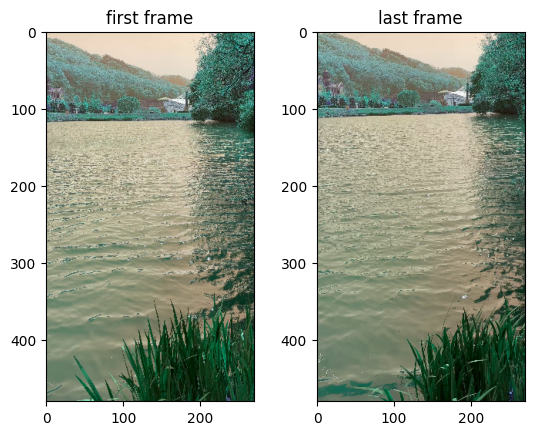

In [5]:
plt.subplot(121)
plt.imshow(frames[0])
plt.title('first frame')
plt.subplot(122)
plt.imshow(frames[-1])
plt.title('last frame')
plt.show()

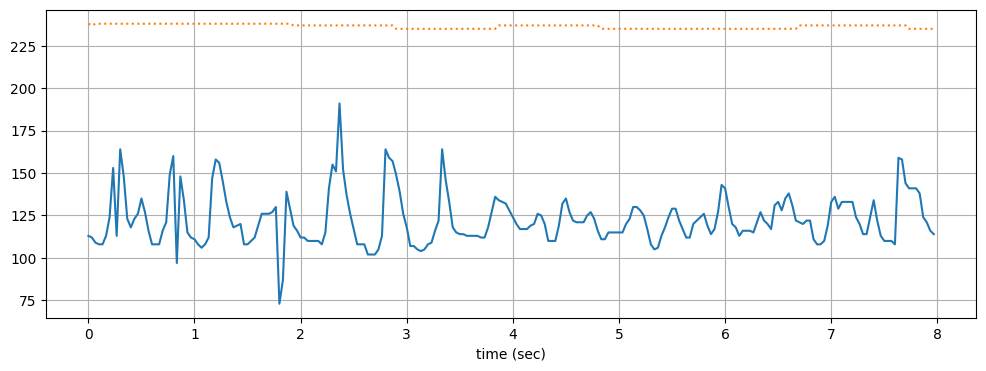

In [6]:
tp = np.arange(len(frames))*(1/fps)

plt.figure(figsize=(12,4))
plt.plot(tp[:240],frames[:240,350,50,2])
plt.plot(tp[:240],frames[:240,10,75,0],':')

plt.grid('minor')
plt.xlabel('time (sec)')
plt.show()